##  LeNet
The trend of deep learning was started in 2012 when AlexNet won the competition ImageNet... AlexNet was inspired on LeNet and it was one of first models to really show the power of convolutional neural networks.
It was first applied to the MNIST-10 dataset,

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from keras.models import model_from_json

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
num_classes = 10
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(X_train, y_train_orig), (X_test, y_test_orig) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## LeNet 5

![LeNet](img/lenet.png)
*source [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)* (1998)

In [4]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='sigmoid', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, (5, 5)))

model.add(Flatten())

model.add(Dense(84, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Archtiecture

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

## Training

In [6]:
batch_size = 32
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
44s - loss: 0.7417 - acc: 0.7454 - val_loss: 0.1596 - val_acc: 0.9513
Epoch 2/10
48s - loss: 0.1251 - acc: 0.9616 - val_loss: 0.0954 - val_acc: 0.9697
Epoch 3/10
48s - loss: 0.0842 - acc: 0.9740 - val_loss: 0.0778 - val_acc: 0.9751
Epoch 4/10
47s - loss: 0.0658 - acc: 0.9797 - val_loss: 0.0524 - val_acc: 0.9833
Epoch 5/10
51s - loss: 0.0567 - acc: 0.9819 - val_loss: 0.0493 - val_acc: 0.9824
Epoch 6/10
51s - loss: 0.0493 - acc: 0.9847 - val_loss: 0.0488 - val_acc: 0.9857
Epoch 7/10
67s - loss: 0.0432 - acc: 0.9862 - val_loss: 0.0464 - val_acc: 0.9847
Epoch 8/10
62s - loss: 0.0396 - acc: 0.9873 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 9/10
63s - loss: 0.0357 - acc: 0.9887 - val_loss: 0.0426 - val_acc: 0.9869
Epoch 10/10
50s - loss: 0.0318 - acc: 0.9899 - val_loss: 0.0403 - val_acc: 0.9869


## Evaluation

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.0403353908529
Test accuracy: 0.9869
CNN Error: 1.31%


## Visualize error

 9920/10000 [============================>.] - ETA: 0s 

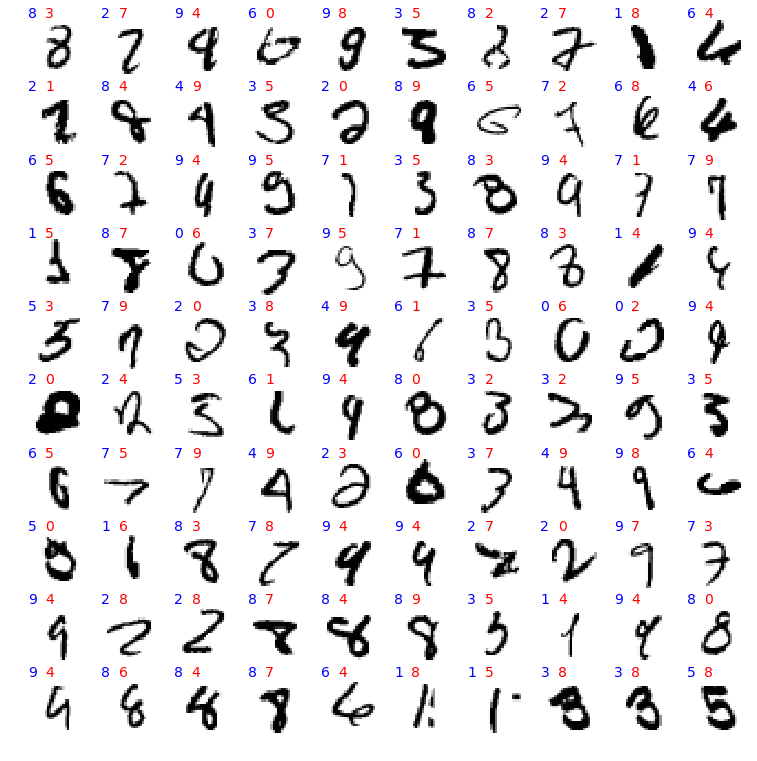

In [8]:
y_hat = model.predict_classes(X_test)
test_wrong = [im for im in zip(X_test,y_hat,y_test_orig) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

## Load/Unload model

In [10]:
# model_json = model.to_json()
# with open("models/lenet.json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights("models/lenet.h5")
# print("Saved model to disk")


# load json and create model
json_file = open('models/lenet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("models/lenet.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


## Tasks

Play around with architecture.
1. Change the number of convolutional layers
2. Change the `kernel_size` (e.g. instead of 5x5 use 3x3)
3. Change the activation function (e.g. instead of `sigmoid` use `relu`)
4. Change optimizers (e.g. `model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.08, momentum=0.8), metrics=['accuracy'])`)
5. Add dropout layer 


## Links
* [Conv DEMO](http://cs231n.github.io/assets/conv-demo/index.html)
* [ConvNetJS MNIST demo](http://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html)